결정 트리

In [1]:
#p106
from sklearn.linear_model import LinearRegression, LogisticRegression#예측용/분류용
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor#분류용/예측용

In [73]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
#cancer = load_breast_cancer() #유방암 데이터
cancer = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [74]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9910714285714286, 0.9210526315789473)

In [75]:
cancer.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [76]:
#108 트리 그림 그리기(파일로 트리를 저장합니다)
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=cancer.target_names,
               feature_names=cancer.feature_names, impurity=False, filled=True)

In [77]:
#graphviz-2.38.msi 설치
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

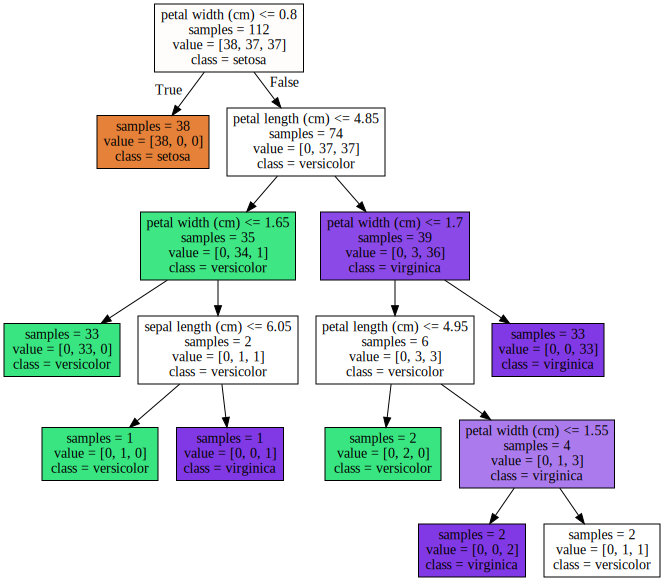

In [78]:
import graphviz # anaconda prompt / pip install graphviz 
with open('tree.dot') as f:
    dot_graph = f.read()    
g = graphviz.Source(dot_graph)
display(g)

In [81]:
#one-hot-encoding
import pandas as pd

In [83]:
df = pd.DataFrame(data=[[1,2,'man'],[2,3,'woman']],columns=['a','b','c'])
df

,a,b,c
0,1,2,man
1,2,3,woman


man 은 1로, woman 은 0으로 변환하면 안되요?
이유
-  man + woman = 2 ?
-  man과 woman의 중간은? (1+0)/2 = 0.5

In [85]:
pd.get_dummies(df)

,a,b,c_man,c_woman
0,1,2,1,0
1,2,3,0,1


- 시간은 범주(o) / 연속 : 0시~24시
  - 1시 < 2시,   24시 > 1시 . 설명이 안됨
- 연도는 범주(0) / 연속 2000년, 2001년,  2000년은 1000년과 3000년
- 사람의 키 - 연속
- 사람의 나이 - 연속, (미성년자, 성년) : 범주